<a href="https://colab.research.google.com/github/soumilsuri/ML-DeepLearning-small-projects-/blob/main/Abalone_ring_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: https://www.kaggle.com/competitions/playground-series-s4e4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/abalone.csv")
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
df.tail()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6
90614,90614,I,0.425,0.325,0.100,0.3455,0.1525,0.0785,0.1050,8


In [ ]:
df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

In [ ]:
df=df.replace(['F', 'I', 'M'],(1,2,0))
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,1,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,0,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,2,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


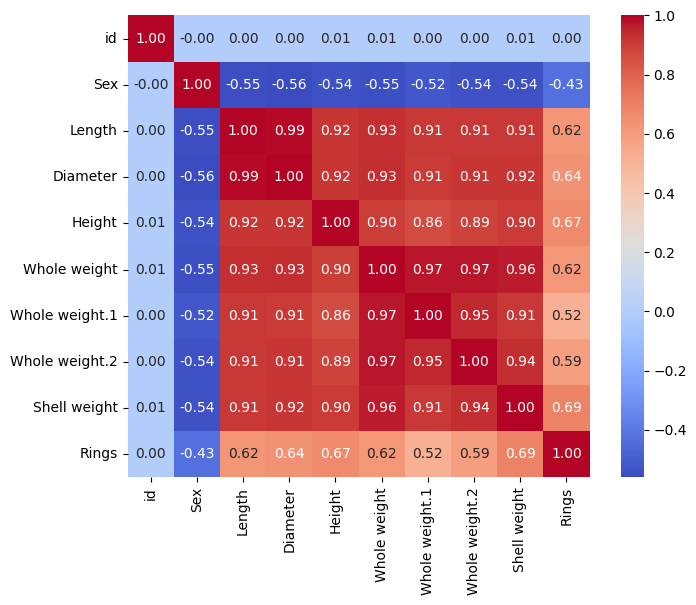

In [ ]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", square=True)
plt.show()

In [ ]:
X=df.drop("Rings",axis=1)
y=df["Rings"]

In [ ]:
chi_scores = chi2(X, y)[0]
p_values = chi2(X, y)[1]

# create a dataframe with chi-squared scores and p-values
chi_df = pd.DataFrame({'Feature': X.columns, 'Chi-squared Score': chi_scores, 'p-value': p_values})

# sort the dataframe by chi-squared score in descending order
chi_df = chi_df.sort_values(by='Chi-squared Score', ascending=False)

chi_df.head(17)

,Feature,Chi-squared Score,p-value
0,id,456058.423227,0.000000e+00
1,Sex,19900.920578,0.000000e+00
5,Whole weight,13543.614849,0.000000e+00
6,Whole weight.1,5437.676481,0.000000e+00
8,Shell weight,4193.119292,0.000000e+00
7,Whole weight.2,2944.790794,0.000000e+00
2,Length,1674.030143,0.000000e+00
3,Diameter,1494.230706,1.672840e-298
4,Height,615.201765,1.973787e-112


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=17,shuffle=True)

# Random forest regressor

In [ ]:
regr1 = RandomForestRegressor()
regr1.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_log_error
y_pred1 = regr1.predict(X_test)

r2_score = r2_score(y_test, y_pred1)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred1))

print("R2 score:", r2_score)
print("Root Mean Squared Log Error:", rmsle)


R2 score: 0.6505947636783607
Root Mean Squared Log Error: 0.15129857623441254


# Linear regression

In [ ]:
regr2=LinearRegression()
regr2.fit(X_train,y_train)

LinearRegression()

In [ ]:
##cant use mean squared log error on linear regression because it is predictiong negative values
from sklearn.metrics import r2_score, mean_absolute_error
y_pred2 = regr2.predict(X_test)

# Calculate R2 score
r2_score = r2_score(y_test, y_pred2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred2)

print("R2 score:", r2_score)
print("Mean Absolute Error (MAE):", mae)

R2 score: 0.6070462514065165
Mean Absolute Error (MAE): 1.3642214842279674


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Neural Network Regression
nn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation
models = {
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Neural Network Regression": y_pred_nn,
    "Decision Tree Regression": y_pred_dt,
    "KNN Regression": y_pred_knn
}

for name, y_pred in models.items():
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}:")
    print(f"R2 score: {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print()


Ridge Regression:
R2 score: 0.606992508053377
Mean Absolute Error (MAE): 1.3638407244468866

Lasso Regression:
R2 score: 0.04652461552414222
Mean Absolute Error (MAE): 2.2386191168339042

Neural Network Regression:
R2 score: -2.2893213796029506
Mean Absolute Error (MAE): 4.7191426480786385

Decision Tree Regression:
R2 score: 0.30266412638740736
Mean Absolute Error (MAE): 1.7265353418308227

KNN Regression:
R2 score: -0.17603256047198212
Mean Absolute Error (MAE): 2.537548970920929

